# Guia para realizar a análise exploratória em um conjunto de dados

Neste exemplo será utilizado um conjunto de dados automobilísticos, baixado do site da UCI. O link para acesso pode ser encontrado abaixo.

Link para mais informações e download do dataset: https://archive.ics.uci.edu/ml/datasets/Automobile

O dataset consiste de informações a respeito dos carros, seus modelos, tipo de combustível, posição do motor, entre outros. O alvo é o preço do carro. Portanto, o objetivo a partir deste conjunto de dados é identificar quais características de um automóvel podem influenciar em seu preço. 

#### É importante ressaltar que o objetivo deste notebook não é realizar a predição de preços, mas sim mostrar quais técnicas podem ser utilizadas ao se lidar com um novo conjunto de dados.

É possível utilizar os métodos aqui apresentados em outros datasets.

### Parte 1 - Leitura e organização dos dados

Inicialmente será realizada a leitura do conjunto de dados e organização das informações, de forma a encontrar valores faltantes em cada coluna.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('auto.csv', header=None, index_col=False)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identificando valores faltantes

Neste caso em específico, os valores ausentes estão retratados como "?", como pode ser visualizado na tabela acima. Desta forma, inicialmente é necessário substituir os "?" por "NaN", tipo de dado que representa um valor ausente.

Posteriormente, para identificar os valores faltantes, pode-se utilizar o metodo dataframe.info(), através dele são exibidos os números de valores não nulos para cada coluna do conjunto de dados. 

In [5]:
#os valores estão com ? no lugar de "NaN"
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Baseado no resumo acima, cada coluna possui 205 linhas de dados, destes, 7 possuem informações faltantes:

1. "normalized-losses": 41 dados ausentes
2. "num-of-doors": 2 dados ausentes
3. "bore": 4 dados ausentes
4. "stroke" : 4 dados ausentes
5. "horsepower": 2 dados ausentes
6. "peak-rpm": 2 dados ausentes
7. "price": 4 dados ausentes

Neste momento, é importante levar em consideração o tipo de informação contido em cada uma destas colunas, uma vez que nem todas possuirão a mesma forma de correção. 

Existem duas formas de lidar com dados faltantes:

- Deletar os dados
- Substituir os dados

No primeiro caso, uma coluna deve ser deletada se a maioria das informações contidas nela estão vazias. Não é o caso neste conjunto. Uma outra situação específica, onde pode ser necessário deletar a linha completamente, é quando a variável alvo não está preenchida. Neste caso, queremos predizer o preço dos carros, porém 4 linhas do nosso conjunto não possuem essa dado. Portanto, estas 4 linhas deverão ser completamente deletadas.

Já quando buscamos substituir os dados vazios, existem diversas formas de fazer isso: substituir pela média, substituir pela frequencia, ou utilizar outras funções para fazer a substituição. 

Abaixo será demonstrado o processo a ser realizado em cada coluna:

1. "normalized-losses": 41 dados ausentes, substituir pela média;
2. "num-of-doors": 2 dados ausentes, substituir pela maior frequência;
3. "bore": 4 dados ausentes, substituir pela média;
4. "stroke" : 4 dados ausentes, substituir pela média;
5. "horsepower": 2 dados ausentes, substituir pela média;
6. "peak-rpm": 2 dados ausentes, substituir pela média;
7. "price": 4 dados ausentes, excluir a linha.

### Substituindo as informações

In [7]:
#normalized-losses

avg_norm_loss = df['normalized-losses'].astype("float").mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

In [8]:
#bore
avg_bore = df["bore"].astype("float").mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace=True)

In [9]:
#stroke
avg_stroke = df['stroke'].astype("float").mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

In [10]:
#horsepower
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [11]:
#peak rpm
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [12]:
#num of doors
#alterando para o mais frequente
freq = df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, freq, inplace=True)

In [13]:
#Preço deve ser deletado
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Agora, os dados de todas as colunas já estão preenchidos, e não existem valores ausentes.

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Tipos de dados

Após identificar todos os dados faltantes e realizar os devidos ajustes em cada um deles, é necessário identificar se cada coluna possui o tipo de dado correto. Ou seja, informações do tipo numérico estão configuradas como inteiro, ou decimal, e as colunas que possuem texto estão configuradas como objetos.

Para isso, utilizamos o método dataframe.dtypes, que exibe o tipo de cada coluna.

In [15]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As seguintes colunas possuem o tipo errado:

1. "bore": Atualmente como objeto, devendo ser alterada para float.
2. "stroke": Atualmente como objeto, devendo ser alterada para float.
3. "normalized-losses": Atualmente como objeto, devendo ser alterada para int.
4. "price": Atualmente como objeto, devendo ser alterada para float.
5. "peak-rpm": Atualmente como objeto, devendo ser alterada para float.

In [16]:
#alterar os dados para o tipo correto
df[['bore', 'stroke', 'peak-rpm', 'price']] = df[['bore', 'stroke', 'peak-rpm', 'price']].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Com os dados em formato correto, pode-se utilizar o metodo dataframe.describe() para exibir um resumo das informações numéricas(também é possível utiliza-lo para exibir as informações das colunas do tipo objeto, porém não é necessário neste momento). Este metodo nos apresenta uma visão  geral de cada coluna. É possível ver o valor médio dos carros, por exemplo, o valor máximo e já realizar algumas analises neste momento.

É possível perceber, por exemplo, que a média do tamanho dos motores é de 126, porém existe um carro com um tamanho de 326. Existe uma possibilidade de que o tamanho do motor influencie no preço? Isto é o que será analisado a seguir.

In [17]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


# Analisando padrões de comportamento

A partir do momento que já se entende o objetivo de cada coluna, os valores faltantes foram eliminados, e já foi realizada uma analise inicial das informações, pode-se iniciar a etapa de analise de padrões de comportamento. Isso diz respeito a tentar entender como as variáveis se relacionam quando comparadas umas as outras.

Na etapa anterior foi citado o caso do tamanho do motor, portanto, estaremos utilizando este exemplo novamente. Queremos identificar se o preço do carro está relacionado ao tamanho de seu motor. Inicialmente será utilizado o método dataframe[['colunas']].corr() para identificar se existe algum tipo de correlação entre as duas variáveis. Porteriormente, um grafico será gerado utilizando a biblioteca Seaborn.

In [18]:
%%capture
!pip install seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [20]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Como pode ser visto na diagonal secundária, existe uma correlação positiva, próxima a 1, entre o preço e o tamanho do motor. Para investigar um pouco mais a fundo, utilizaremos um gráfico com as duas colunas.

(0, 53350.743684979214)

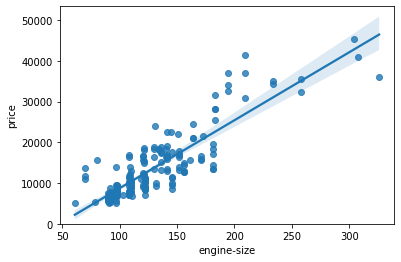

In [21]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

A partir deste gráfico percebe que a medida com que o tamanho do motor aumenta, o seu preço também aumenta. Esta informação será util ao selecionarmos as features que serão utilizadas para a predição.

Também é possível utilizar informações categóricas e verificar o quanto elas podem influenciar na variável alvo. Neste caso, será utilizada a coluna "body-style", que representa se o carro é um sedan, hatch, entre outros, em comparação com o preço. 

Será utiliziado um gráfico de caixas para apresentar essas informações.

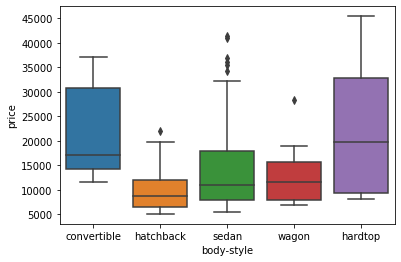

In [22]:
sns.boxplot(x="body-style", y="price", data=df)

Como podemos perceber, os carros conversíveis possuem um preço inicial maior, e os carros hatch não chegam a um valor muito alto. Os sedans possuem varias faixas de preço, enquanto os carros do tipo "hardtop" (que não possuem um pilar entre as portas) possuem os preços mais elevados neste conjunto de dados.

Ainda neste contexto, pode-se levar a variável localização do motor em consideração. Um gráfico, similar ao apresentado anteriormente será gerado.

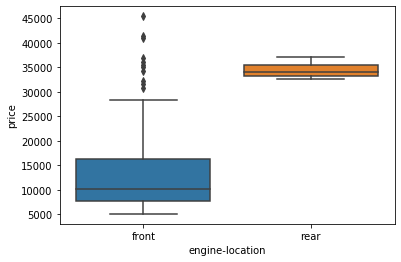

In [23]:
sns.boxplot(x="engine-location", y="price", data=df)

Neste caso, ainda mais claro do que o exemplo anterior, pode-se perceber que os carros que possuem o motor na traseira possuem um valor mais alto, sempre acima de 30 mil. Já os carros com o motor na parte da frente podem ser encontrados em diversas faixas de preço, até mesmo mais altas do que o motor traseiro.

Esse tipo de visualização nos permite entender como o algoritmo deverá se comportar. Por exemplo, um carro com motor traseiro deverá essencialmente ter um preço médio mais alto do que os com o motor na frente. Novamente, está variável deverá ser levada em consideração ao se realizar a predição de preços.

# Conclusão

A análise exploratória permite compreender o conjunto de dados sendo utilizado em algum projeto. São realizados os ajustes de dados faltantes, correção dos tipos de dados, e analises de correlação. Esta etapa pode possuir etapas diferentes, dependendo do dataset a ser utilizado, porém os metodos aqui demonstrados representam uma base 